<a href="https://colab.research.google.com/github/mvharsh/Deep-Learning/blob/main/CNN/CNN_Monkey_Breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
# Define paths to training and testing directories
train_dir = '/content/drive/MyDrive/Monkey Breed Dataset/train'
test_dir = '/content/drive/MyDrive/Monkey Breed Dataset/testing'

# Define parameters for image preprocessing and augmentation
batch_size = 32
image_size = (150, 150)  # Resize images to 150x150 pixels

# Use ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom transformations
    horizontal_flip=True)  # Horizontal flips

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing data

# Load training and testing datasets using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')  # Use 'categorical' for multiple classes

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')  # Use 'categorical' for multiple classes

# Check the classes that were automatically detected
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

# DefDefineine the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(len(class_names), activation='softmax')  # Change output layer to softmax
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)


Found 60 images belonging to 3 classes.
Found 6 images belonging to 3 classes.
Class names: ['m0', 'm1', 'm2']
Epoch 1/20
2/2 [==============================] - 8s 2s/step - loss: 1.3098 - accuracy: 0.3667 - val_loss: 1.1442 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 4s 2s/step - loss: 1.1415 - accuracy: 0.3333 - val_loss: 1.0878 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 6s 2s/step - loss: 1.0739 - accuracy: 0.3333 - val_loss: 1.0738 - val_accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 1.0557 - accuracy: 0.3500 - val_loss: 1.0495 - val_accuracy: 0.3333
Epoch 5/20
2/2 [==============================] - 8s 2s/step - loss: 1.0223 - accuracy: 0.3333 - val_loss: 0.9829 - val_accuracy: 0.3333
Epoch 6/20
2/2 [==============================] - 4s 2s/step - loss: 0.9285 - accuracy: 0.6333 - val_loss: 0.8018 - val_accuracy: 0.8333
Epoch 7/20
2/2 [==============================] - 5s 2s/step - loss

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 173ms/step - loss: 0.2074 - accuracy: 0.8333
Test Loss: 0.20735950767993927
Test Accuracy: 0.8333333134651184


In [ ]:
from sklearn.metrics import classification_report

# Predict classes for test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels
y_true = test_generator.classes

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


1/1 [==============================] - 0s 186ms/step
Classification Report:
              precision    recall  f1-score   support

          m0       0.00      0.00      0.00         2
          m1       0.00      0.00      0.00         2
          m2       0.33      0.50      0.40         2

    accuracy                           0.17         6
   macro avg       0.11      0.17      0.13         6
weighted avg       0.11      0.17      0.13         6



In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[0 1 1]
 [1 0 1]
 [0 1 1]]


Enter the path to the uploaded image: /content/drive/MyDrive/Monkey Breed Dataset/testing/m2/n200.jpg
1/1 [==============================] - 0s 36ms/step


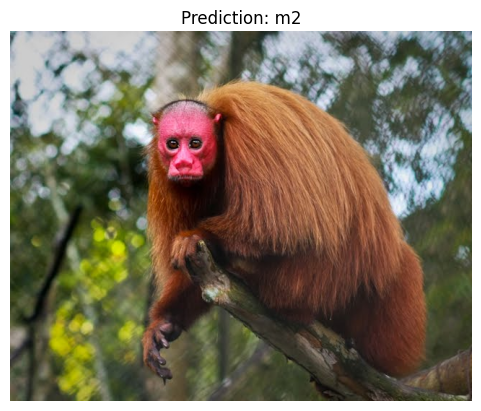

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Rescale pixel values to [0, 1]

# Function to predict the class of the uploaded image
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    return predicted_class

# xis('ofExample usage:
uploaded_image_path = input("Enter the path to the uploaded image: ")
prediction = predict_image(uploaded_image_path)

# Display the uploaded image and the prediction
img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()
